In [1]:
library(datasets) #데이터셋 로딩
data<-as.vector(Nile) #나일강의 유량 데이터
data

[1] 1120 1160  963 1210 1160 1160  813 1230 1370 1140  995  935 1110  994 1020
 [16]  960 1180  799  958 1140 1100 1210 1150 1250 1260 1220 1030 1100  774  840
 [31]  874  694  940  833  701  916  692 1020 1050  969  831  726  456  824  702
 [46] 1120 1100  832  764  821  768  845  864  862  698  845  744  796 1040  759
 [61]  781  865  845  944  984  897  822 1010  771  676  649  846  812  742  801
 [76] 1040  860  874  848  890  744  749  838 1050  918  986  797  923  975  815
 [91] 1020  906  901 1170  912  746  919  718  714  740

In [2]:
library(TTR)
library(forecast)

Warning message:
"package 'TTR' was built under R version 3.6.2"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Warning message:
"package 'forecast' was built under R version 3.6.2"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


[1] "ts"

[1] "numeric"

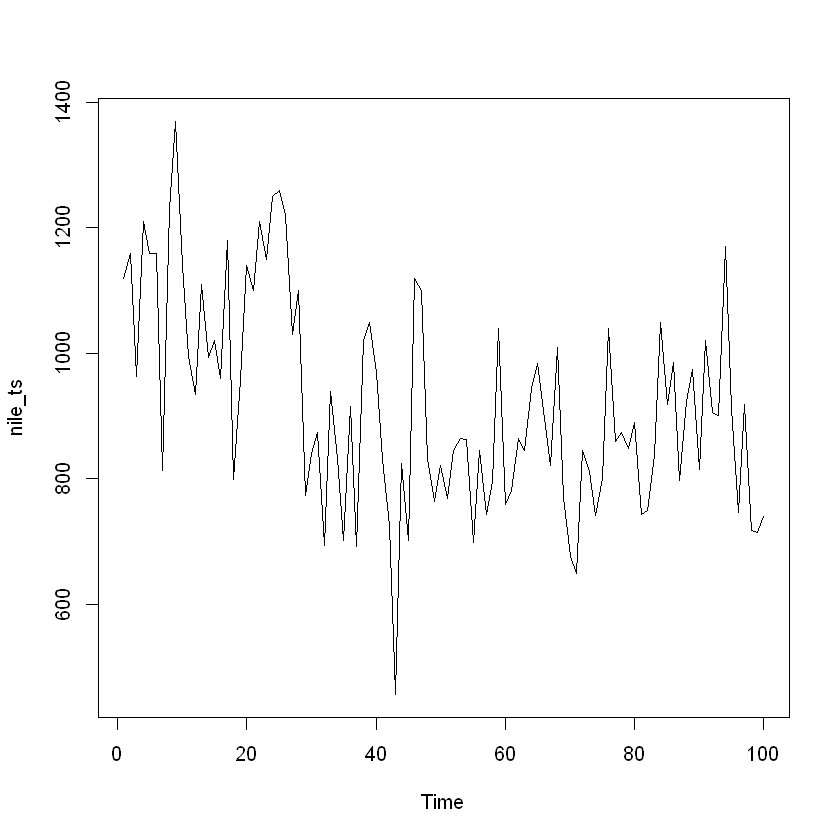

In [5]:
nile_ts<- ts(data) #시계열 타입으로 변환
class(Nile)
plot.ts(nile_ts) #시계열 그래프
class(data)

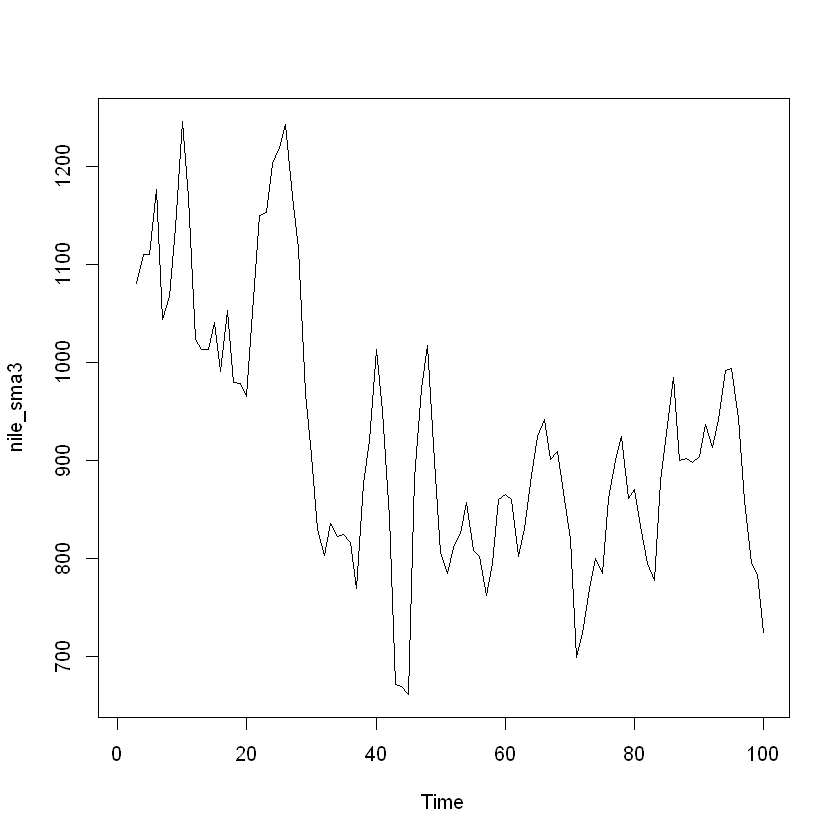

In [6]:
nile_sma3<-SMA(nile_ts, n=3) #3차 이동 평균값
plot.ts(nile_sma3) 

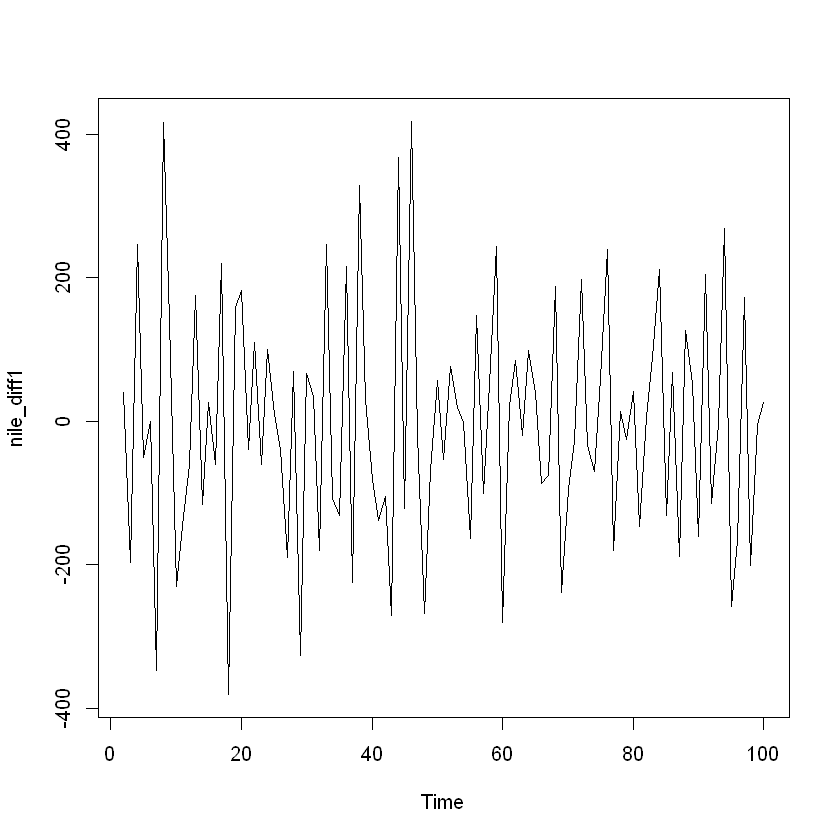

In [7]:
nile_diff1<-diff(nile_ts, differneces=1) #1차 차분값
plot.ts(nile_diff1)

In [8]:
library(tseries) #안정적인 시계열 데이터인지 검사
adf.test(diff(log(nile_ts)),alternative='stationary',k=0)

Warning message:
"package 'tseries' was built under R version 3.6.2"Warning message in adf.test(diff(log(nile_ts)), alternative = "stationary", k = 0):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  diff(log(nile_ts))
Dickey-Fuller = -15.334, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


In [10]:
auto.arima(nile_ts) #최적의 아리마모형 파라미터 도출
# arima(p,d,q)
#ARIMA(1,1,1)

Series: nile_ts 
ARIMA(1,1,1) 

Coefficients:
         ar1      ma1
      0.2544  -0.8741
s.e.  0.1194   0.0605

sigma^2 estimated as 20177:  log likelihood=-630.63
AIC=1267.25   AICc=1267.51   BIC=1275.04

    Point Forecast    Lo 80     Hi 80    Lo 95    Hi 95
101       816.1813 635.9909  996.3717 540.6039 1091.759
102       835.5596 642.7830 1028.3363 540.7332 1130.386
103       840.4889 643.5842 1037.3936 539.3492 1141.629
104       841.7428 642.1115 1041.3741 536.4331 1147.053
105       842.0617 640.0311 1044.0923 533.0826 1151.041

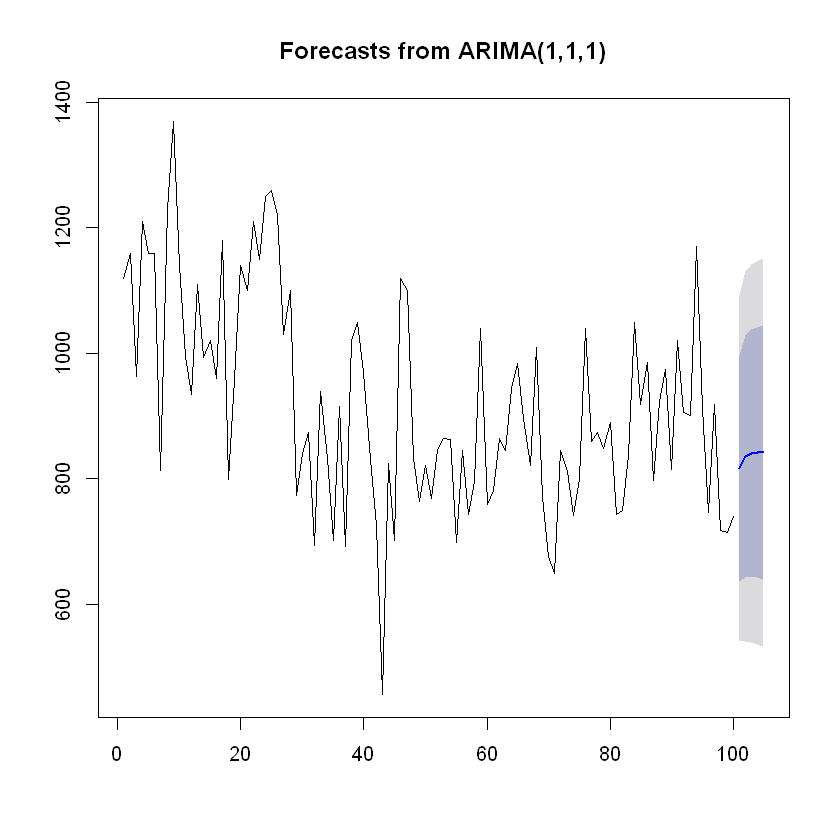

In [11]:
nile_arima<-arima(nile_ts, order=c(1,1,1)) #아리마 모형 생성
nile_fcast<-forecast(nile_arima,h=5) #예측함수 실행
nile_fcast
plot(nile_fcast)